In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import datetime

('CCLD', 'B04', 'IR1', 'IR3', 'VIS')
('cloud', 'psf', 'qvapor', 'rain', 'sst', 'wind', 'winu', 'wn10')


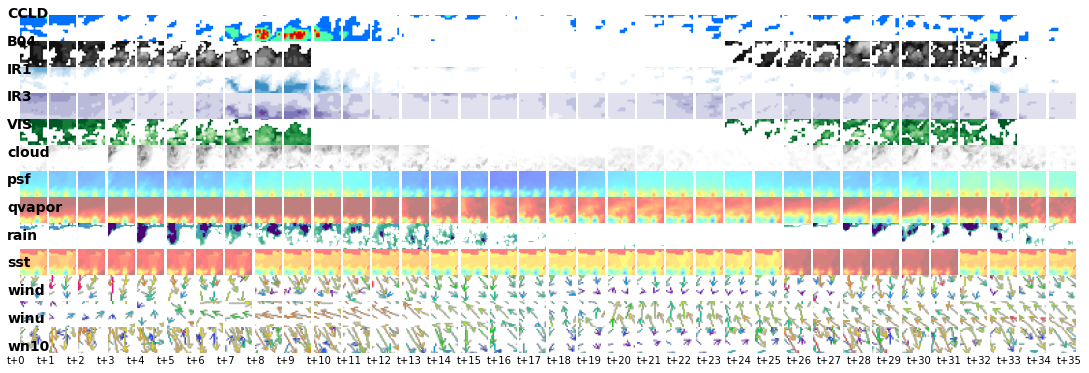

In [74]:
SEQUENCE = 36

fig = plt.figure(figsize=(15,5))
spec = gridspec.GridSpec(ncols=SEQUENCE, nrows=13)    
spec.update(wspace=0, hspace=0)
predictionPath = '../mining_sadewa/sadewa/{}/{}_{}_{}.png'
observationPath = '../mining_sadewa/sadewa/{}/H89_{}_{}.png'
paths = (observationPath, predictionPath)
usedDatas = (('CCLD','B04','IR1','IR3','VIS'),('cloud','psf','qvapor','rain','sst','wind','winu','wn10'))
cropExtents = (([928,942],[512,526]),([317,337],[227,247])) #20x20 respectively

startDate = datetime.datetime(2020,2,1,0,0)
dateLists = [startDate+datetime.timedelta(hours=x) for x in range(SEQUENCE)]

dataCount = 0
for i, predobs in enumerate(usedDatas):
    print(predobs)
    for j, sdata in enumerate(predobs):
        path = paths[i]
        for date in dateLists:
            dateformats = ((date.strftime('%Y%m%d%H%M'),None),(date.strftime('%Y%m%d'),date.strftime('%H')))
            formatPath = path.format(sdata, sdata, dateformats[i][0], dateformats[i][1])
            img = mpimg.imread(formatPath)
            img=img[cropExtents[i][0][0]:cropExtents[i][0][1], cropExtents[i][1][0]:cropExtents[i][1][1]]
            
            ax = fig.add_subplot(spec[dataCount])
            ax.imshow(img)
            ax.set_axis_off()
            
            dataCount+=1
            
# labeling the axis
xlabels = np.arange(0,SEQUENCE,1)
ylabels = ('wn10', 'winu', 'wind', 'sst', 'rain', 'qvapor', 'psf', 'cloud', 'VIS', 'IR3', 'IR1', 'B04', 'CCLD')

for i, xlabel in enumerate(xlabels):
    fig.text(((1/len(xlabels))*i)+(0/len(xlabels)), 0, f't+{xlabel}')
for i, ylabel in enumerate(ylabels):
    fig.text(0, ((1/len(ylabels))*i)+(0.5/len(ylabels)), ylabel, weight='bold', fontsize=14)

fig.tight_layout()

plt.show()

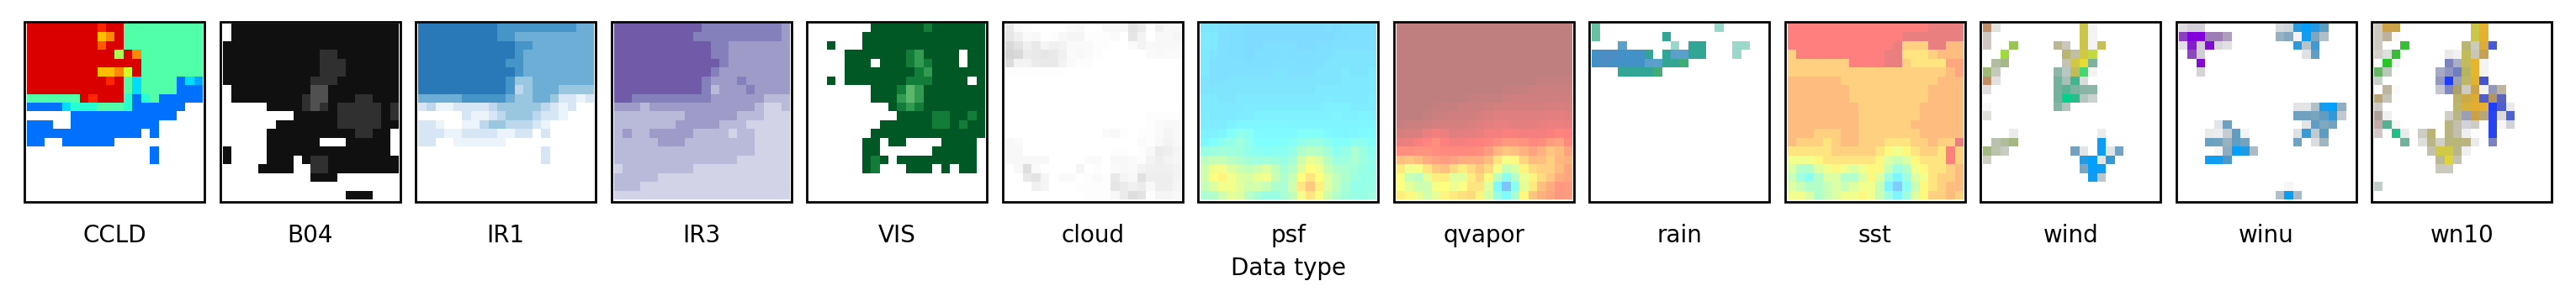

In [98]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

figsizeMultiplication = 1.5
ROW = 1 # number of datas
COLUMN = 13
fig, ax = plt.subplots(figsize=(COLUMN*figsizeMultiplication,ROW*figsizeMultiplication), dpi=200)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

cropExtents = (([905,925],[400,420]),([317,337],[227,247])) #20x20 respectively
usedDatas = (('CCLD','B04','IR1','IR3','VIS'),('cloud','psf','qvapor','rain','sst','wind','winu','wn10'))
predictionPath = '../mining_sadewa/sadewa/{}/{}_{}_{}.png'
observationPath = '../mining_sadewa/sadewa/{}/H89_{}_{}.png'



startDate = datetime.datetime(2020,2,1,0,0)
dateLists = [startDate+datetime.timedelta(hours=x) for x in range(ROW)]

paths = (observationPath, predictionPath)


for j in range(COLUMN):
    # due to different params to fetch prediction and observation, we need to do this
    if j >= len(usedDatas[0]):
        pos = 1
        roll = j - len(usedDatas[0])
    else:
        pos = 0
        roll = j
    for i in range(ROW):
        
        dateformats = ((dateLists[i].strftime('%Y%m%d%H%M'),None),(dateLists[i].strftime('%Y%m%d'),dateLists[i].strftime('%H')))
        formatPath = paths[pos].format(usedDatas[pos][roll], usedDatas[pos][roll], dateformats[pos][0], dateformats[pos][1])
        img = mpimg.imread(formatPath)

        img = img[cropExtents[pos][0][0]:cropExtents[pos][0][1], cropExtents[pos][1][0]:cropExtents[pos][1][1]]

        imagebox = OffsetImage(img, zoom=2.5*figsizeMultiplication)
        ab = AnnotationBbox(imagebox, (j/COLUMN+0.5/COLUMN,i/ROW+0.5/ROW), pad=0.1)
        ax.add_artist(ab)

#plt.axis('off')
ax.tick_params(which='both', width=0)

sides = ('left','top','right','bottom')
for side in sides:
    vis = ax.spines[side]
    vis.set_visible(False)
        
plt.yticks([])
plt.xticks(ticks=np.arange(0.5/COLUMN,1,1/COLUMN), labels=('CCLD','B04','IR1','IR3','VIS','cloud','psf','qvapor','rain','sst','wind','winu','wn10'))
plt.xlabel('Data type')
        
plt.draw()
plt.show()


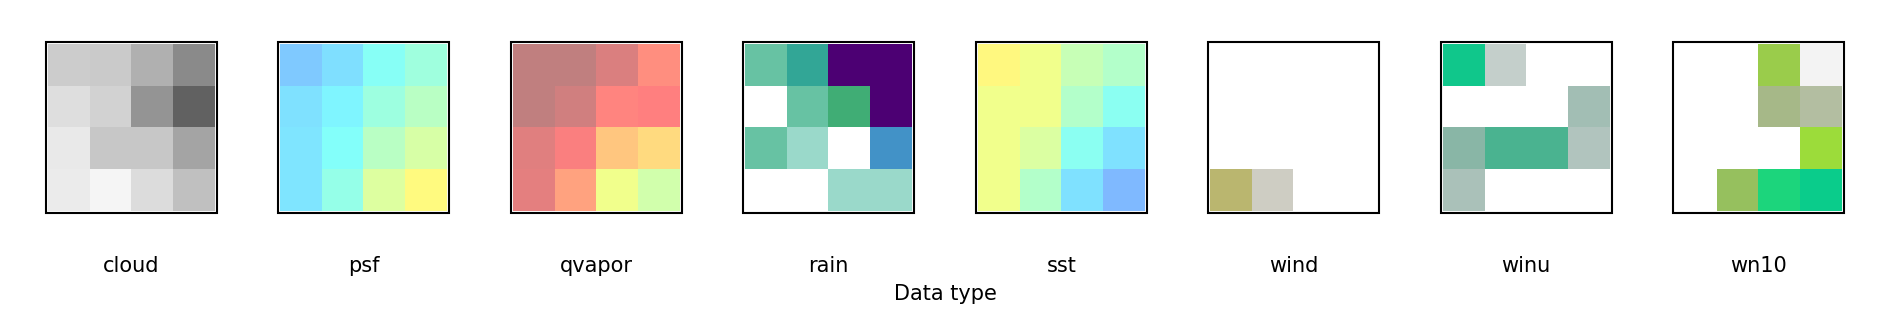

In [50]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

figsizeMultiplication = 2
ROW = 1 # number of datas
COLUMN = len(usedDatas)

fig, ax = plt.subplots(figsize=(COLUMN*figsizeMultiplication,ROW*figsizeMultiplication), dpi=150)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

cropExtents = ([332, 336],[236, 240]) #4x4 respectively
usedDatas = ('cloud','psf','qvapor','rain','sst','wind','winu','wn10')
predictionPath = '../mining_sadewa/sadewa/{}/{}_{}_{}.png'

startDate = datetime.datetime(2019,12,31,12,0)
dateLists = [startDate+datetime.timedelta(hours=x) for x in range(ROW)]

for idx, data in enumerate(usedDatas):   
    formatPath = predictionPath.format(data, data, (startDate+datetime.timedelta(hours=ROW)).strftime('%Y%m%d'), (startDate+datetime.timedelta(hours=ROW)).strftime('%H'))
    img = mpimg.imread(formatPath)

    img = img[cropExtents[0][0]:cropExtents[0][1], cropExtents[1][0]:cropExtents[1][1]]

    imagebox = OffsetImage(img, zoom=10*figsizeMultiplication)
    ab = AnnotationBbox(imagebox, (idx/COLUMN+0.5/COLUMN,0.5/ROW), pad=0.1)
    ax.add_artist(ab)

#plt.axis('off')
ax.tick_params(which='both', width=0)

sides = ('left','top','right','bottom')
for side in sides:
    vis = ax.spines[side]
    vis.set_visible(False)
        
plt.yticks([])
plt.xticks(ticks=np.arange(0.5/COLUMN,1,1/COLUMN), labels=('cloud','psf','qvapor','rain','sst','wind','winu','wn10'))
plt.xlabel('Data type')
        
plt.draw()
plt.show()


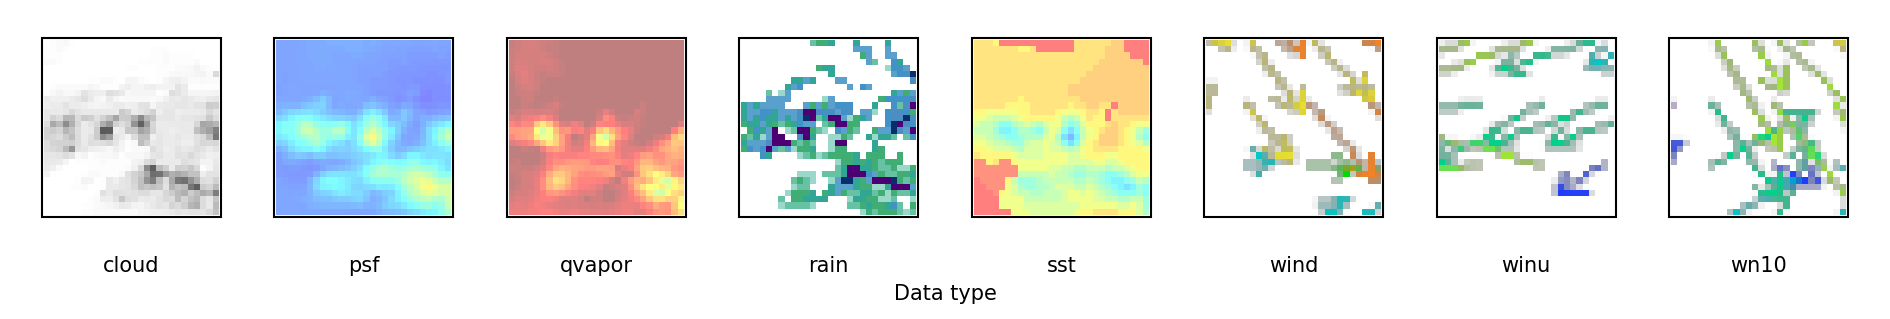

In [51]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

figsizeMultiplication = 2
ROW = 1 # number of datas
COLUMN = len(usedDatas)

fig, ax = plt.subplots(figsize=(COLUMN*figsizeMultiplication,ROW*figsizeMultiplication), dpi=150)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

cropExtents = ([320, 348],[224, 252]) #28x28 respectively
usedDatas = ('cloud','psf','qvapor','rain','sst','wind','winu','wn10')
predictionPath = '../mining_sadewa/sadewa/{}/{}_{}_{}.png'

startDate = datetime.datetime(2019,12,31,12,0)
dateLists = [startDate+datetime.timedelta(hours=x) for x in range(ROW)]

for idx, data in enumerate(usedDatas):   
    formatPath = predictionPath.format(data, data, (startDate+datetime.timedelta(hours=ROW)).strftime('%Y%m%d'), (startDate+datetime.timedelta(hours=ROW)).strftime('%H'))
    img = mpimg.imread(formatPath)

    img = img[cropExtents[0][0]:cropExtents[0][1], cropExtents[1][0]:cropExtents[1][1]]

    imagebox = OffsetImage(img, zoom=1.5*figsizeMultiplication)
    ab = AnnotationBbox(imagebox, (idx/COLUMN+0.5/COLUMN,0.5/ROW), pad=0.1)
    ax.add_artist(ab)

#plt.axis('off')
ax.tick_params(which='both', width=0)

sides = ('left','top','right','bottom')
for side in sides:
    vis = ax.spines[side]
    vis.set_visible(False)
        
plt.yticks([])
plt.xticks(ticks=np.arange(0.5/COLUMN,1,1/COLUMN), labels=('cloud','psf','qvapor','rain','sst','wind','winu','wn10'))
plt.xlabel('Data type')
        
plt.draw()
plt.show()
